In [1]:
import pandas as pd
df_link = pd.read_csv(r"C:\Users\ARUN KUMAR\Desktop\261  & 264\package 261 & 264\movie_data\links.csv")
df_movies = pd.read_csv(r'C:\Users\ARUN KUMAR\Desktop\261  & 264\package 261 & 264\movie_data\movies.csv')
df_ratings = pd.read_csv(r'C:\Users\ARUN KUMAR\Desktop\261  & 264\package 261 & 264\movie_data\ratings.csv')
df_tags = pd.read_csv(r'C:\Users\ARUN KUMAR\Desktop\261  & 264\package 261 & 264\movie_data\tags.csv')


In [2]:
df_link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [3]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [29]:
# Handle missing values
df_link.dropna(inplace=True)
df_movies.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_tags.dropna(inplace=True)


In [30]:
# Identify and remove duplicate rows in each DataFrame
df_link.drop_duplicates(inplace=True)
df_movies.drop_duplicates(inplace=True)
df_ratings.drop_duplicates(inplace=True)
df_tags.drop_duplicates(inplace=True)


In [41]:
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')

#### How many unique "userId" are available in "ratings.csv"?


In [42]:
df_ratings['userId'].nunique()

610

#### Which movie has recieved maximum number of user ratings?



In [43]:
ratings_count = df_ratings.groupby('movieId')['rating'].count()
max_ratings_movie_id = ratings_count.idxmax()
max_ratings_movie_title


'Forrest Gump (1994)'

#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [51]:
# Case-insensitive search for "The Matrix (1999)" in the movies DataFrame
matrix_movie_id = df_movies[df_movies['title'].str.contains('matrix', case=False)]['movieId']

if not matrix_movie_id.empty:
    matrix_movie_id = matrix_movie_id.values[0]
    # Filter the tags DataFrame for the movieId
    matrix_tags = df_tags[df_tags['movieId'] == matrix_movie_id]

    # Display the tags for "The Matrix (1999)"
    print("Tags for 'The Matrix (1999)':")
    print(matrix_tags['tag'].unique())
else:
    print("The Matrix (1999) not found in the dataset.")


Tags for 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [65]:
terminator_ratings = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']
average_rating = terminator_ratings['rating_mean'].mean()
average_rating


3.970982142857143

#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

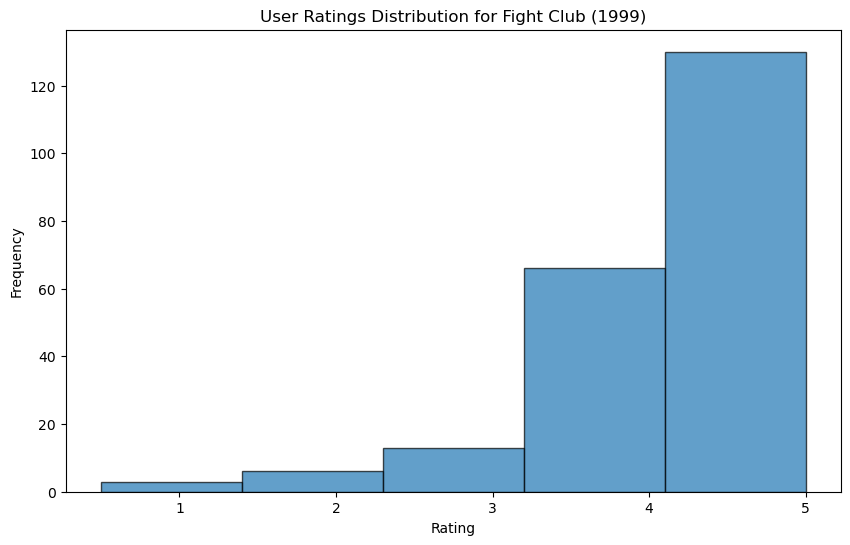

In [66]:
import matplotlib.pyplot as plt
fight_club_movie_id = df_movies[df_movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = df_ratings[df_ratings['movieId'] == fight_club_movie_id]
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


##  filtered_data

#### Which movie is the most popular based on  average user ratings?
Answer this question only after applying the above mentioned "Mandatory Operration".
5 points
Godfather, T

In [47]:
# Group the user ratings based on movieId and apply aggregation operations
ratings_grouped = df_ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

# Apply inner join on movies DataFrame and the grouped ratings DataFrame
merged_data = pd.merge(df_movies, ratings_grouped, on='movieId', how='inner')

# Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['rating_count'] > 50]

# Display the updated DataFrame
print(filtered_data.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [48]:
# Find the movieId with the highest average rating in the filtered data
most_popular_filtered_movie_id = filtered_data['rating_mean'].idxmax()

# Use the movieId to get the corresponding movie title from the filtered_data DataFrame
most_popular_filtered_movie_title = filtered_data.loc[most_popular_filtered_movie_id, 'title']

print(f"The most popular movie based on average user ratings (with more than 50 ratings) is: {most_popular_filtered_movie_title}")


The most popular movie based on average user ratings (with more than 50 ratings) is: Shawshank Redemption, The (1994)


In [49]:
# Sort the filtered data by rating_count in descending order
top5_popular_movies = filtered_data.sort_values(by='rating_count', ascending=False).head(5)

# Display the top 5 popular movies based on number of user ratings
print("Top 5 popular movies based on number of user ratings:")
print(top5_popular_movies[['title', 'rating_count']])


Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [50]:
# Filter the data for Sci-Fi movies
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Sort the Sci-Fi movies by rating_count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Find the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie_title = sorted_sci_fi_movies.iloc[2]['title']

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi_movie_title}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)
